# Assignment 8
### Rebecca Hawthorne
### 8/23/2023

### The libraries you will use are already loaded for you below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [3]:
#read in Netflix files
Netflix_credit_df = pd.read_csv('Data/Netflix/credits.csv')

Netflix_title_df = pd.read_csv('Data/Netflix/titles.csv')

#look at data types
Netflix_title_df.dtypes

unique_genres_array=Netflix_title_df['genres'].unique()

#list of all characters to remove
char_remove=['[', ']', '\'', ',']

#go through and remove each one
for char in char_remove:
     unique_genres_array= [ele.replace(char, '') for ele in unique_genres_array]


#empty list
unique_genres_list = list()

for element in unique_genres_array:
    unique_genres_list.append(element.split(' '))

#chain lists together
unique_genres_list=list(chain(*unique_genres_list))

#remove duplicates and empty spaces(where no genre was listed)
unique_genres_list = list(set(unique_genres_list))
unique_genres_list.remove("")

print(unique_genres_list)


['scifi', 'reality', 'crime', 'fantasy', 'comedy', 'sport', 'european', 'history', 'horror', 'action', 'animation', 'drama', 'romance', 'documentation', 'music', 'western', 'thriller', 'war', 'family']


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [4]:
#find mean imdb scores, grouped by release year
mean_imdb_score_by_year = Netflix_title_df.groupby('release_year')['imdb_score'].mean()

#convert to a dataframe
mean_imdb_score_by_year_df = pd.DataFrame(mean_imdb_score_by_year)

max_year = mean_imdb_score_by_year_df.idxmax(skipna=True)
max_score = mean_imdb_score_by_year_df.max(skipna=True)

print('In the year '+ str(max_year['imdb_score'])+ 
      ", the highest average IMDB score, " 
      + str(max_score['imdb_score'])+", was achieved.")

In the year 1985, the highest average IMDB score, 8.0, was achieved.


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [1]:
#get just actors (remove directors)
Netflix_credit_actors_df = Netflix_credit_df[Netflix_credit_df["role"] =='ACTOR']

#count actors by movie id
total_actors_by_id = Netflix_credit_actors_df.groupby(['id'])['person_id'].count()

#join to Netflix_title_df 
Netflix_title_and_actor = Netflix_title_df.merge(total_actors_by_id, how='outer', on='id')

largest_actor_index = Netflix_title_and_actor['person_id'].idxmax(skipna=True)

print("The movie with the largest number of actors is " 
      + Netflix_title_and_actor.loc[largest_actor_index, 'title'])


NameError: name 'Netflix_credit_df' is not defined

## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

The Robert De Niro movie with the highest IMDB core is Taxi Drivermade in 1976


Text(0.5, 0, 'IMDB Score')

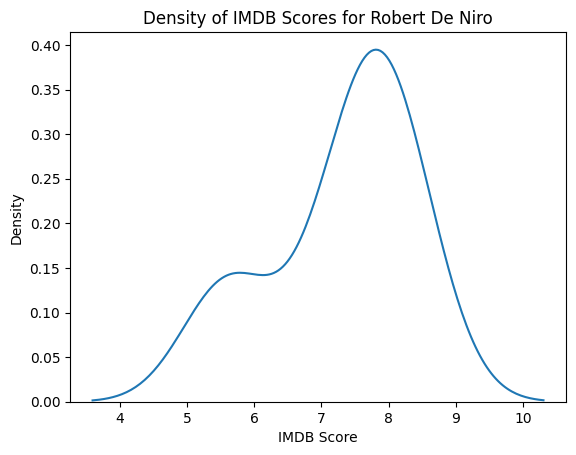

In [5]:

#df of Robert De Niro credits
Robert_De_Niro = Netflix_credit_df[Netflix_credit_df["name"] =='Robert De Niro']

#merge to titles data only keeping Robert De Niro films
Robert_De_Niro_titles = Robert_De_Niro.merge(Netflix_title_df, how='left', on='id')

#get index of max imdb score
max_imdb_RDN_index = Robert_De_Niro_titles['imdb_score'].idxmax(skipna=True)

print('The Robert De Niro movie with the highest IMDB core is ' 
      +str( Robert_De_Niro_titles.loc[max_imdb_RDN_index, 'title'])
      + 'made in '
      + str(Robert_De_Niro_titles.loc[max_imdb_RDN_index, 'release_year']))



sns.kdeplot(x='imdb_score'
           ,data=Robert_De_Niro_titles)

plt.title('Density of IMDB Scores for Robert De Niro')
plt.xlabel('IMDB Score')


## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


C:\Users\hawthorner\AppData\Local\Temp\ipykernel_2604\1574626028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_title_df['war_movies'][idx] = ' war' in str(Netflix_title_df['description'][idx]).lower()
C:\Users\hawthorner\AppData\Local\Temp\ipykernel_2604\1574626028.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_title_df['gangster_movies'][idx] = 'gangster' in str(Netflix_title_df['description'][idx]).lower()


There are  3  titles with both war and gangster.
The Average IMDB Score for war_movies is 6.863934426229508 and the mean imdb score for gangster_movies is 6.3914285714285715, therefore war movies have a higher average IMDB score.


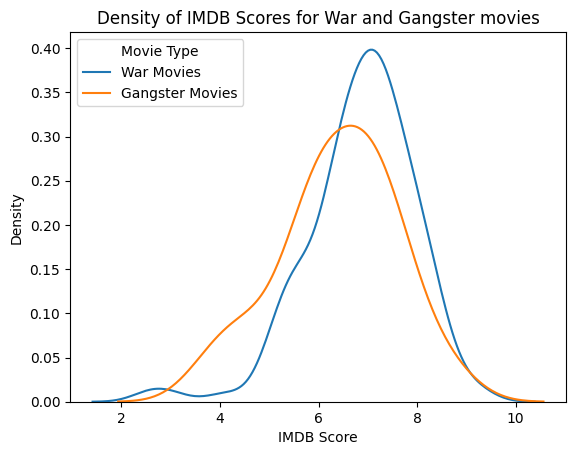

In [11]:
#create new columns for war and gangster movies
Netflix_title_df[['war_movies', 'gangster_movies']] = ''

#look for war and gangster in decription and set truth value of war and gangster columns

for idx in range(len(Netflix_title_df)):
    Netflix_title_df['war_movies'][idx] = ' war' in str(Netflix_title_df['description'][idx]).lower()
    Netflix_title_df['gangster_movies'][idx] = 'gangster' in str(Netflix_title_df['description'][idx]).lower()

#set count and then count how many were war and gangster

count = 0

for idx in range(len(Netflix_title_df)):
    if (Netflix_title_df['war_movies'][idx] == True) &  (Netflix_title_df['gangster_movies'][idx] == True):
        count += 1
        
print('There are ', count, ' titles with both war and gangster.') 

#find mean imdb scores for both

mean_war_movie_imdb_score = Netflix_title_df.query("war_movies == True").groupby('war_movies')['imdb_score'].mean()

mean_gangster_movie_imdb_score = Netflix_title_df.query("gangster_movies == True").groupby('gangster_movies')['imdb_score'].mean()


 
print('The Average IMDB Score for war_movies is '
      +str(mean_war_movie_imdb_score[0])
      + ' and the mean imdb score for gangster_movies is ' 
      +str(mean_gangster_movie_imdb_score[0])
      +", therefore war movies have a higher average IMDB score.") 


#creat kde plot
sns.kdeplot(x = 'imdb_score'
           ,data = Netflix_title_df.query('war_movies == True'))
sns.kdeplot(x = 'imdb_score'
           ,data = Netflix_title_df.query('gangster_movies == True'))
plt.title('Density of IMDB Scores for War and Gangster movies')
plt.xlabel('IMDB Score')

plt.legend(title='Movie Type', loc='upper left', 
           labels = ['War Movies', 'Gangster Movies'])  

plt.show()